In [1]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from numpy import where
import pandas as pd
import numpy as np
import random

## For Example Dataset

In [2]:
X1, Y1 = make_classification(n_samples=1000, n_features=2, n_redundant=0,
 n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=3)

In [55]:
pd.DataFrame(X1)[0: 2]

,0,1
0,1.075229,1.074655
1,0.605683,1.180433


In [46]:
def scatter_plot(X, Y, counter):
    for label, _ in counter.items():   
        if label == 0: marker = 'o'
        else: marker = 'x'
        row_ix = where(Y == label)[0]
        pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label), marker=marker)
    pyplot.legend()
    pyplot.show()

In [47]:
def apply_SMOTE(X, Y):
    # display the count of each class
    counter = Counter(Y)
    print(counter)
    # plot the scatter plot for the original datapoints
    scatter_plot(X, Y, counter)
    # apply smote technique
    oversample = SMOTE(k_neighbors=5)
    X, Y = oversample.fit_resample(X, Y)
    # display the count of each class after SMOTE
    counter = Counter(Y)
    print(counter)
    # plot the scatter plot for the modified datapoints
    scatter_plot(X, Y, counter)    

Counter({0: 990, 1: 10})


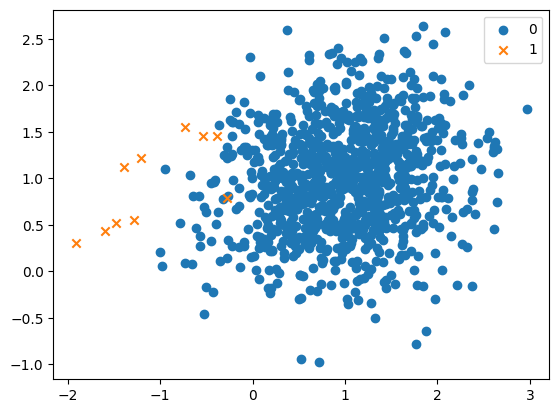

Counter({0: 990, 1: 990})


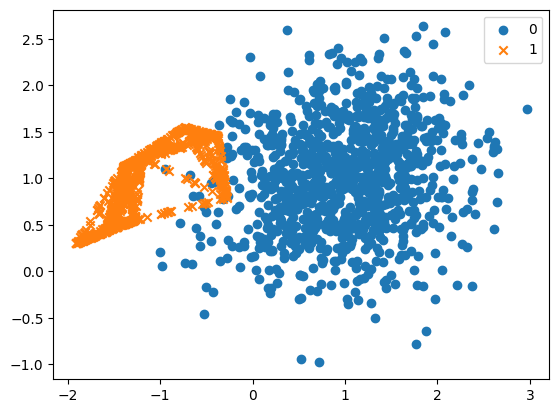

In [48]:
apply_SMOTE(X1, Y1)

## For Selected Dataset

In [49]:
data = pd.read_csv('../Country Quater Wise Visitors Imputed.csv')
x1 = list(data['2014 1st quarter (Jan-March)'])  #60
x2 = list(data['2014 2nd quarter (Apr-June)'])[0: 10]  #10

y1 = [0 for i in range(len(x1))]
y2 = [1 for i in range(len(x2))]

In [50]:
X2 = np.array([[i, round(random.random()*50, 2)] for i in (x1 + x2)])
Y2 = np.array(y1 + y2)

In [51]:
f1 = pd.DataFrame({'2014 1st quarter (Jan-March)': x1})
f2 = pd.DataFrame({'2014 2nd quarter (Apr-June)': x2})

f1, f2

(    2014 1st quarter (Jan-March)
 0                           33.1
 1                           25.7
 2                           46.8
 3                           31.0
 4                           23.6
 ..                           ...
 58                          28.0
 59                          32.1
 60                          29.7
 61                          25.2
 62                          25.5
 
 [63 rows x 1 columns],
    2014 2nd quarter (Apr-June)
 0                         14.5
 1                         22.0
 2                         15.6
 3                         18.8
 4                         20.3
 5                         17.1
 6                         18.5
 7                         16.0
 8                         17.5
 9                         17.8)

Counter({0: 63, 1: 10})


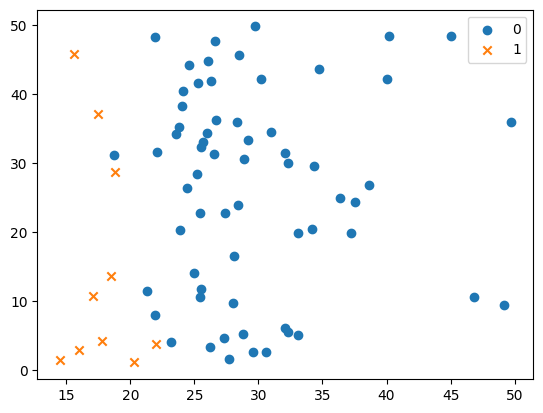

Counter({0: 63, 1: 63})


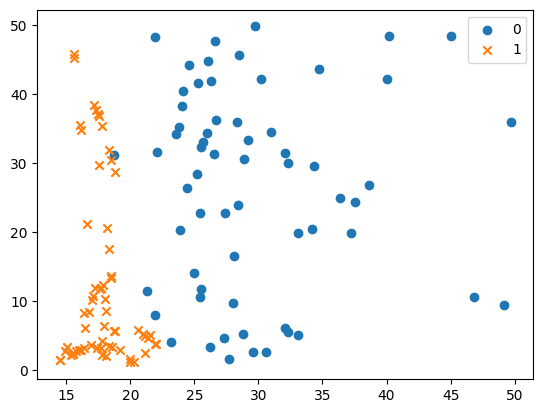

In [54]:
apply_SMOTE(X2, Y2)